**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?



### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [17]:
def fibonacci(N):
    if N <= 1:
        return N
    else:
        return fibonacci(N-1) + fibonacci(N-2)

N=14
[fibonacci(i) for i in range(N+1)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

In [60]:
import numpy as np
from matplotlib import pyplot as plt

class Problem2():
    def __init__(self):
        self.a = -1
        self.b = 1
    
    def generate(self,N=500):
        self.pts = self.a + (self.b-self.a)*np.random.random((2,N))
        self.x = self.pts[0]
        self.y = self.pts[1]

    def display(self):
        length = np.size(self.x)
        fig = plt.figure(figsize=(5,5))

        for i in range(length):
            if self.x[i] > 0 and self.y[i] > 0:
                plt.scatter(self.x[i],self.y[i],color='r')
            elif self.x[i] < 0 and self.y[i] > 0:     
                plt.scatter(self.x[i],self.y[i],color='g')
            elif self.x[i] < 0 and self.y[i] < 0:     
                plt.scatter(self.x[i],self.y[i],color='b')  
            else:
                plt.scatter(self.x[i],self.y[i],color='magenta')

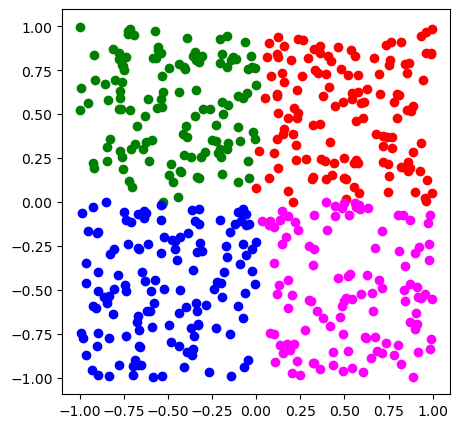

In [61]:
pr=Problem2()
pr.generate()
pr.display()

### **Problem3:**

Write a decorator that calls a function twice.

In [76]:
def call_twice(func):
    def wrapper(*args, **kwargs):
            for _ in range(6):
                print(func(*args, **kwargs))
    return wrapper
    
@call_twice
def my_f(arr):
    return arr

my_f(np.array([1,2]))

[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.